In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("../data/churn-bigml-80.csv")

In [41]:
# Data Cleaning/Analysis
df.info()
print(df.head())


print("Missing values:\n", df.isna().sum().sort_values(ascending=False).head(10))
print("Duplicates:", df.duplicated().sum())
print("Churn balance:\n", df["Churn"].value_counts(normalize=True))

for i in ["International plan", "Voice mail plan"]:
    print(f"\n{i} categories:\n", df[i].value_counts())

print("\nUnique states:", df["State"].nunique())
print("Area codes:\n", df["Area code"].value_counts())

display(df.describe())

df["Churn_int"] = df["Churn"].astype(int)

corr_churn = df.select_dtypes(include = ["number"]).corrwith(df["Churn_int"]).sort_values(ascending=False)
print(corr_churn)

df.drop(columns=["Churn_int"], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Churn_int                 1.000000
Customer service calls    0.202590
Total day charge          0.195689
Total day minutes         0.195688
Total intl charge         0.086216
Total intl minutes        0.086204
Total eve minutes         0.072906
Total eve charge          0.072893
Total night minutes       0.033639
Total night charge        0.033635
Total day calls           0.018290
Account length            0.017728
Total night calls         0.012262
Area code                 0.001019
Total eve calls          -0.001539
Total intl calls         -0.069882
Number vmail messages    -0.086474
dtype: float64


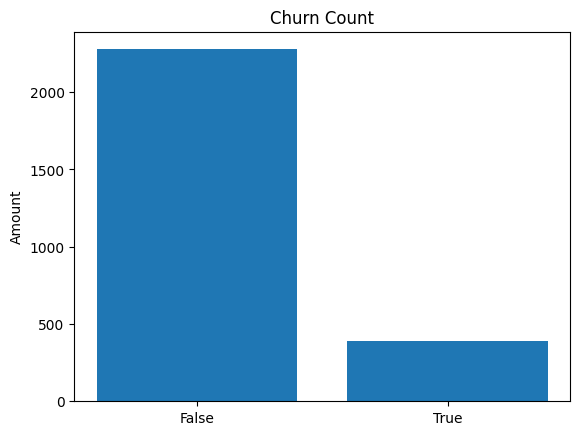

In [42]:
counts = df["Churn"].value_counts()

plt.figure()
plt.bar(counts.index.astype(str), counts)
plt.title("Churn Count")
plt.xlabel("")
plt.ylabel("Amount")
plt.show()

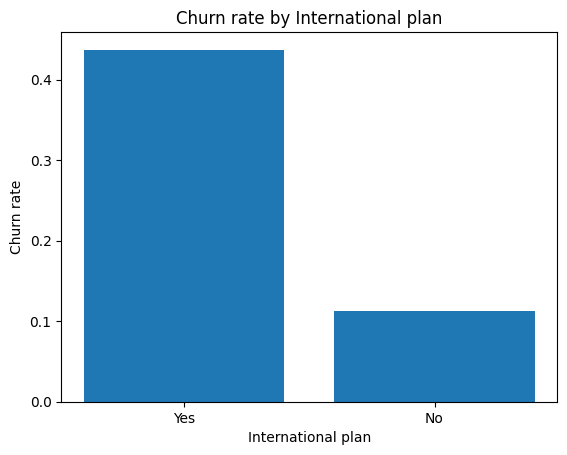

In [43]:
churn_rate_int = df.groupby("International plan")["Churn"].mean().sort_values(ascending=False)

plt.figure()
plt.bar(churn_rate_int.index.astype(str), churn_rate_int.values)
plt.title("Churn rate by International plan")
plt.xlabel("International plan")
plt.ylabel("Churn rate")
plt.show()

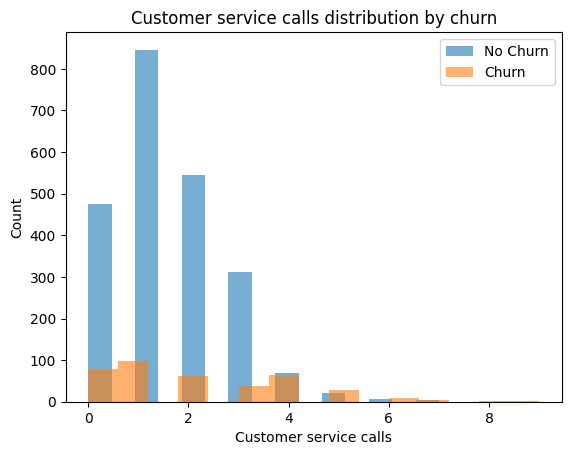

In [44]:
plt.figure()
plt.hist(df.loc[df["Churn"] == False, "Customer service calls"], bins=15, alpha=0.6, label="No Churn")
plt.hist(df.loc[df["Churn"] == True,  "Customer service calls"], bins=15, alpha=0.6, label="Churn")
plt.title("Customer service calls distribution by churn")
plt.xlabel("Customer service calls")
plt.ylabel("Count")
plt.legend()
plt.show()

Model Training is in src/train.py

APP is in app/app.py